In [677]:
#importing all the libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import plotly.graph_objs as go
import plotly as py
import plotly.plotly as py
from plotly.graph_objs import *
import os
os.chdir('C:\pc documents\Dallas\Course sem3\Python\assignment 1')
# import plotly.plotly as py
# py.sign_in('varun4519', 'brKiMtOimLVlNAJXX4Wf') 
# plotly.tools.set_credentials_file(username='varun4519', api_key='brKiMtOimLVlNAJXX4Wf')
%matplotlib inline
# new_cwd

In [684]:
#Importing the dataset
d1 = pd.read_csv(r'C:\pc documents\Dallas\Course sem3\Python\assignment 1\all_house_senate_2010.csv',header= 0, usecols =[0,1,2,3,4,5,6,7,18,19], dtype={"dis_amo": str})
d2 = pd.read_csv(r'C:\pc documents\Dallas\Course sem3\Python\assignment 1\all_house_senate_2012.csv',header= 0, usecols =[0,1,2,3,4,5,6,7,18,19], dtype={"dis_amo": str})
d3 = pd.read_csv(r'C:\pc documents\Dallas\Course sem3\Python\assignment 1\all_house_senate_2014.csv',header= 0, usecols =[0,1,2,3,4,5,6,7,18,19], dtype={"dis_amo": str})
d4 = pd.read_csv(r'C:\pc documents\Dallas\Course sem3\Python\assignment 1\all_house_senate_2016.csv',header= 0, encoding='ISO-8859-1',
	usecols =[0,1,2,3,4,5,6,7,18,19], dtype={"dis_amo": str})

In [521]:
#Concatenating
d5 = pd.concat([d1,d2,d3,d4])

In [422]:
len(d5)

3327922

In [522]:
#Changing to string
d5['dis_amo']  = d5['dis_amo'].str.replace('$', '')
d5['dis_amo']  = d5['dis_amo'].str.replace(',', '')
d5['dis_amo']  = d5['dis_amo'].astype(float)

#Plot 1

In [523]:
dsamp = d5.sample(frac= 0.1, replace= True, random_state= 123)
print(dsamp)

           com_id                                          com_nam     can_id  \
773630  C00386276              RUSS CARNAHAN IN CONGRESS COMMITTEE  H0MO00019   
277869  C00448415                         ROB CURNOCK FOR CONGRESS  H8TX17107   
28030   C00331496                         GARY MILLER FOR CONGRESS  H8CA41063   
633415  C00505776                              FRIENDS OF MIA LOVE  H2UT04023   
368947  C00376749               RODNEY ALEXANDER FOR CONGRESS INC.  H2LA05084   
213393  C00458877                           KINZINGER FOR CONGRESS  H0IL11052   
549909  C00557983                          HOWIE LIND FOR CONGRESS  H4VA10121   
847208  C00373464                            TIM RYAN FOR CONGRESS  H2OH17109   
557912  C00607291                              KEMPER FOR CONGRESS  H6KY06127   
222674  C00411330                        FRIENDS OF BERNIE SANDERS  S4VT00033   
609086  C00379735                                COLE FOR CONGRESS  H2OK04055   
396845  C00372102           

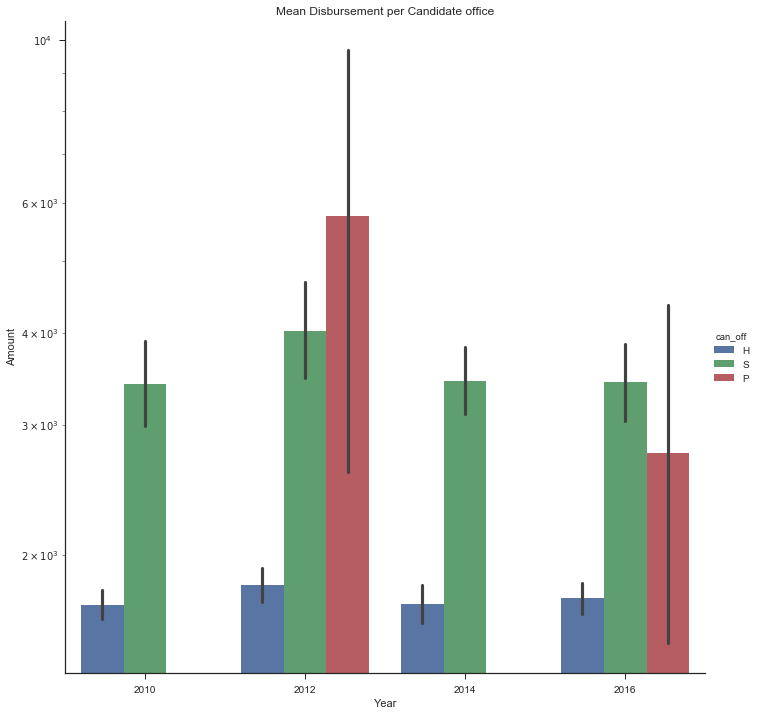

In [560]:
# BAR PLOT YEAR VS AMOUNT WITH HUE CANDIDATE OFFICE
#Setting the ticks on both axes
sns.set(style="ticks")
#plotting
a = sns.factorplot(x='ele_yea',y='dis_amo',data= dsamp,kind='bar',size =10,hue ='can_off')
#Scaling the y axes to a logrithmic scale for better representation
a.fig.get_axes()[0].set_yscale('log')
#Setting the labels and titles
a.set(xlabel= 'Year',ylabel= 'Amount',title = 'Mean Disbursement per Candidate office')


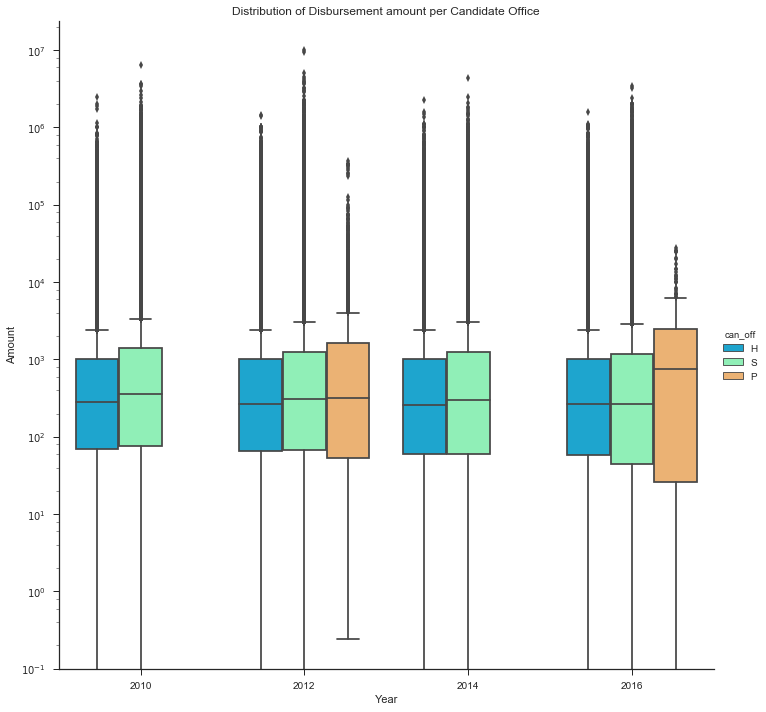

In [561]:
#Plot 2
#BOX PLOT FOR YEAR VS AMOUNT
#Setting the ticks on both axes
sns.set(style="ticks")
#plotting
b = sns.factorplot(x="ele_yea", y="dis_amo", data=d5, kind= 'box', size = 10, palette= 'rainbow' ,hue= 'can_off')
#Scaling the y axes to a logrithmic scale for better representation
b.fig.get_axes()[0].set_yscale('log')
#Setting the labels and titles
b.set(xlabel= 'Year',ylabel= 'Amount',title = "Distribution of Disbursement amount per Candidate Office")


In [562]:
#Plot 3
# Preparing the data
com_max = d5.groupby(['ele_yea','com_nam']).agg({'dis_amo':'max'}).reset_index().copy()
#Year wise data on commitee disbursement amount
year10 = com_max[com_max['ele_yea'] == 2010].sort_values('dis_amo',ascending = 0).head(5)
year12 = com_max[com_max['ele_yea'] == 2012].sort_values('dis_amo',ascending = 0).head(5)
year14 = com_max[com_max['ele_yea'] == 2014].sort_values('dis_amo',ascending = 0).head(5)
year16 = com_max[com_max['ele_yea'] == 2016].sort_values('dis_amo',ascending = 0).head(5)
#Concatenating the yearwise datasets
yearvsamo = pd.concat([year10,year12,year14,year16])
#Resetting the Index of the data frame
year_vs_amo = yearvsamo.pivot('com_nam', 'ele_yea').reset_index()








0           NaN
1           NaN
2     6500000.0
3           NaN
4           NaN
5           NaN
6           NaN
7     2638910.0
8           NaN
9           NaN
10          NaN
11    3696650.0
12          NaN
13          NaN
14    3395392.0
15    2500000.0
16          NaN
17          NaN
Name: (dis_amo, 2010), dtype: float64

In [615]:

# plotting the graph in different traces each representin a year
trace1 = go.Bar(
    x=year_vs_amo['dis_amo',2010],
    y=year_vs_amo['com_nam'],
    name='2010',
    orientation = 'h'
)
trace2 = go.Bar(
    x=year_vs_amo['dis_amo',2012],
    y=year_vs_amo['com_nam'],
    name='2012',
    orientation = 'h'
)
trace3 = go.Bar(
    x=year_vs_amo['dis_amo',2014],
    y=year_vs_amo['com_nam'],
    name='2014',
    orientation = 'h'
)
trace4 = go.Bar(
    x=year_vs_amo['dis_amo',2016],
    y=year_vs_amo['com_nam'],
    name='2016',
    orientation = 'h'
 )

#Combining the traces
data = [trace1,trace2,trace3,trace4]
layout = go.Layout(
    barmode='stack',
    title='Maximum amount disbursed by the 5 top commitees per year ',
    yaxis = dict(title ='Amount'),
    xaxis = dict(title ='Commitee'),
    width = 800,
#Adjusting the margin of the graph
    margin=go.Margin(
        l=300,
        r=50,
        b=100,
        t=100,
        pad=4
    )
    ,
    
    annotations=[dict(align = 'bottomright')]
        
)
fig = go.Figure(data=data, layout=layout)
#plotting the graph with iplot 
py.offline.iplot(fig,filename='hover-chart-basic')


In [588]:
#Plot 4
#Preparing the data
samp = d5.groupby(['ele_yea','can_off_sta']).agg({'dis_amo':'sum'}).reset_index().copy()
#Year wise data on candidate office state disbursement amount
samp10 = samp[samp['ele_yea'] == 2010].sort_values('dis_amo',ascending = 0).head(5)
samp12 = samp[samp['ele_yea'] == 2012].sort_values('dis_amo',ascending = 0).head(5)
samp14 = samp[samp['ele_yea'] == 2014].sort_values('dis_amo',ascending = 0).head(5)
samp16 = samp[samp['ele_yea'] == 2016].sort_values('dis_amo',ascending = 0).head(5)




,ele_yea,can_off_sta,dis_amo
5,2010,CA,1.654786e+08
10,2010,FL,1.466791e+08
37,2010,NY,1.342270e+08
41,2010,PA,1.032650e+08
7,2010,CT,9.257896e+07
60,2012,CA,1.786374e+08
102,2012,TX,1.476545e+08
65,2012,FL,1.160462e+08
93,2012,OH,1.064905e+08
92,2012,NY,1.064854e+08


In [656]:
import plotly.plotly as py
import pandas as pd
import plotly
from plotly.graph_objs import *
plotly.offline.init_notebook_mode(connected=True)
from plotly import tools
# plotting the graph in different traces each representing a year for diff sub plots
trace1 = go.Scatter( 
    x = samp10['can_off_sta'],
    y = samp10['dis_amo'],
    mode = 'line',
    name = '2010',
    marker = dict(
       size = 10,
       color = 'rgba(255, 182, 193, .9)',
       line = dict(
           width = 2
       )
    )
)
   
trace2 = go.Scatter( 
    x = samp12['can_off_sta'],
    y = samp12['dis_amo'],
    mode = 'line',
    name = '2012',
    marker = dict(
       size = 10,
       color = 'rgba(255, 182, 193, .9)',
       line = dict(
           width = 2
       )
    )
)
trace3 =  go.Scatter( 
    x = samp14['can_off_sta'],
    y = samp14['dis_amo'],
    mode = 'line',
    name = '2014',
    marker = dict(
       size = 10,
       color = 'rgba(255, 182, 193, .9)',
       line = dict(
           width = 2
       )
    )
)
trace4 = go.Scatter( 
    x = samp16['can_off_sta'],
    y = samp16['dis_amo'],
    mode = 'line',
    name = '2016',
    marker = dict(
       size = 10,
       color = 'rgba(255, 182, 193, .9)',
       line = dict(
           width = 2
       )
    )
)
#Setting the titles for the figure
fig = tools.make_subplots(rows=2, cols=2, subplot_titles=('States with highest Disbursements-2010', 'States with highest Disbursements-2012',
                                                          'States with highest Disbursements-2014', 'States with highest Disbursements-2016'))

#Combining all the traces into one plot
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)

#Setting the layout
fig['layout'].update(height=900, width=900, title='First Five States with Max Disbursement Amount per Year',  
                                          yaxis = dict(title ='Amount'),
                     xaxis = dict(title ='States'))
#Plotting the Multiple plots
plotly.offline.iplot(fig, filename='make-subplots-multiple-with-titles')



This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



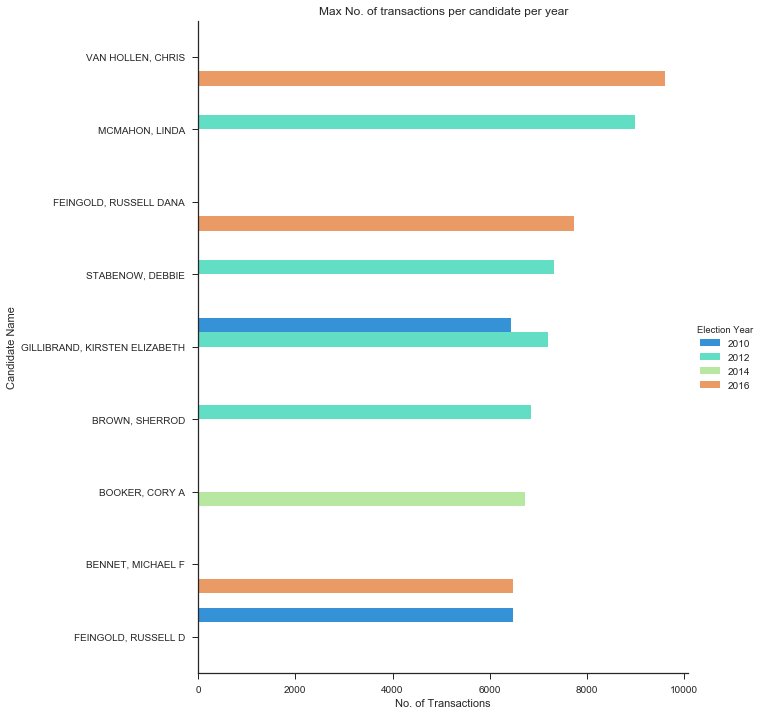

In [622]:
#Plot 5
#Max No. of transactions per candidate per year
#Preparing the data
samp1 = d5.groupby(['ele_yea','can_nam']).agg({'dis_amo':'count'}).reset_index()
#Sorting the values in descending order
samp1 = samp1.sort_values('dis_amo',ascending = 0).head(10)
#Renamed the legend title
samp1 = samp1.rename(columns={'ele_yea':'Election Year'})
sns.set(style="ticks")
#Plotting the graph
d = sns.factorplot(x="dis_amo", y="can_nam", data= samp1 , kind= 'bar', size = 10, palette= 'rainbow' ,hue= 'Election Year')
#Setting the title ,xlabel,ylabel
d.set(xlabel= 'No. of Transactions',ylabel= 'Candidate Name',title ='Max No. of transactions per candidate per year')


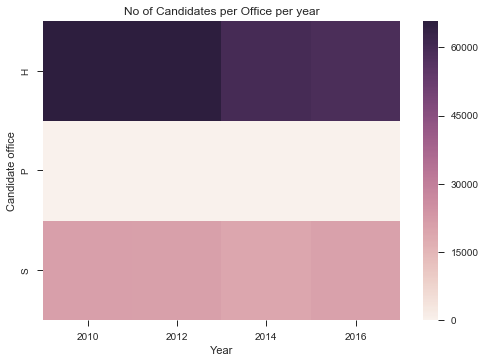

In [624]:
#Plot 6
# Preparing the Data
e = dsamp.pivot_table(values='can_id',index='can_off',columns='ele_yea', aggfunc = 'count')
# Handling the NA
e = e.fillna(value=0)
# Plotting the heat map
e = sns.heatmap(e)
#Setting the axes and title
e.set(xlabel= 'Year',ylabel= 'Candidate office',title = 'No of Candidates per Candidate Office per year')

AttributeError: 'Series' object has no attribute 'set'

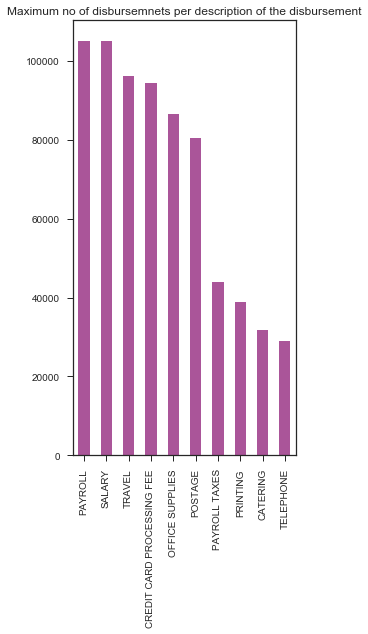

In [626]:
#Plot 6
#Preparing the data
d5['dis_pur_des'] = d5['dis_pur_des'].str.replace('CREDIT CARD PROCESSING FEES','CREDIT CARD PROCESSING FEE')
d5[d5['dis_pur_des'] == 'CREDIT CARD PROCESSING FEES']
c = d5['dis_pur_des'].value_counts()
c= c.head(10)
# Plotting the maximum no of disbursemnets per description of the disbursement
c.plot(x='Disbursement Description Count', y= 'Disbursement Descriptionkind',title= 'Maximum no of disbursemnets per description of the disbursement', kind = 'bar',figsize = (4,8),color = '#aa5599')
c.set(xlabel ='Disbursement Description Count',ylabel='Disbursement Description kind')

In [382]:
#Plot 7
# #converting to string
# for col in df.columns:
#     df[col] = df[col].astype(str)
#defining colour scale 
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

#creating text on hover
df['text'] = d5['can_nam']+'<br>'+' was from '+'<br>'+\
             d5['can_off_sta']+'<br>'+'for the office '+d5['can_off']+'<br>'+'in year '+d5['ele_yea']
    
#plotting data    
data = [dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = d5['can_off_sta'],
        z = d5['dis_amo'].astype(float),
        locationmode = 'USA-states',
        text = d5['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,050,010)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Candidate wise amount per year per office per state")
    

SyntaxError: unexpected EOF while parsing (<ipython-input-382-3906683e2475>, line 28)

In [643]:
#plot 8
#Preparing the data for the plottiing the map
pam = d5.groupby(['can_off_sta']).agg({'can_id':'nunique'}).reset_index()

In [648]:
import plotly.plotly as py
import pandas as pd
import plotly
from plotly.graph_objs import *
plotly.offline.init_notebook_mode(connected=True)

#Color Scale
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
#Trace for Chloropeth map
trace1 = Choropleth(
    z=pam['can_id'],
    autocolorscale=False,
    colorscale=scl,
    locationmode='USA-states',
    locations= pam['can_off_sta'],
    name='Candidates',
    showscale=False,
    zauto=True
)

data = Data([trace1])
#Layout Configuration
layout = Layout(
    autosize=False,
    geo=dict(
        lakecolor='rgb(255, 255, 255)',
        lonaxis=dict(
            gridwidth=1.5999999999999999,
            range=[-180, -50],
            showgrid=False
        ),
        projection=dict(
            type='albers usa'
        ),
        scope='usa',
        showrivers=False,
        showsubunits=True,
        showlakes = True
    ),
        
    title='<b>No. of candidates per state</b>',
    width= 800,
    margin = dict(
        l=0,
        r=50,
        b=100,
        t=100,
        pad=4)
       
)
fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig, filename='pace')

In [650]:

#plot 9# Preparing the data 
off = d5[d5['dis_pur_des'].str.contains('office supplies', case=0, na=False)]
off


,com_id,com_nam,can_id,can_nam,ele_yea,can_off,can_off_sta,can_off_dis,dis_amo,dis_pur_des
28,C00372102,JIM GERLACH FOR CONGRESS COMMITTEE,H2PA06114,"GERLACH, JIM",2010,H,PA,6.0,22.00,OFFICE SUPPLIES
55,C00372102,JIM GERLACH FOR CONGRESS COMMITTEE,H2PA06114,"GERLACH, JIM",2010,H,PA,6.0,47.12,OFFICE SUPPLIES
140,C00389197,ALLYSON SCHWARTZ FOR CONGRESS,H4PA13124,"SCHWARTZ, ALLYSON Y.",2010,H,PA,13.0,209.81,OFFICE SUPPLIES
596,C00389197,ALLYSON SCHWARTZ FOR CONGRESS,H4PA13124,"SCHWARTZ, ALLYSON Y.",2010,H,PA,13.0,378.38,OFFICE SUPPLIES
610,C00389197,ALLYSON SCHWARTZ FOR CONGRESS,H4PA13124,"SCHWARTZ, ALLYSON Y.",2010,H,PA,13.0,655.71,EQUIPMENT AND OFFICE SUPPLIES
627,C00002600,JOHN D. DINGELL FOR CONGRESS,H6MI16034,"DINGELL, JOHN D. MR.",2010,H,MI,15.0,77.76,OFFICE SUPPLIES
682,C00389197,ALLYSON SCHWARTZ FOR CONGRESS,H4PA13124,"SCHWARTZ, ALLYSON Y.",2010,H,PA,13.0,21.19,OFFICE SUPPLIES
735,C00002600,JOHN D. DINGELL FOR CONGRESS,H6MI16034,"DINGELL, JOHN D. MR.",2010,H,MI,15.0,77.85,OFFICE SUPPLIES
781,C00389197,ALLYSON SCHWARTZ FOR CONGRESS,H4PA13124,"SCHWARTZ, ALLYSON Y.",2010,H,PA,13.0,256.56,OFFICE SUPPLIES
798,C00389197,ALLYSON SCHWARTZ FOR CONGRESS,H4PA13124,"SCHWARTZ, ALLYSON Y.",2010,H,PA,13.0,349.11,OFFICE SUPPLIES


In [651]:
# Gathering and sorting the data per year
offsup = off.groupby(['ele_yea']).agg({'dis_pur_des':'count'}).reset_index().copy()
year10 = offsup[offsup['ele_yea'] == 2010].sort_values('dis_pur_des',ascending = 0).head(5)
year12 = offsup[offsup['ele_yea'] == 2012].sort_values('dis_pur_des',ascending = 0).head(5)
year14 = offsup[offsup['ele_yea'] == 2014].sort_values('dis_pur_des',ascending = 0).head(5)
year16 = offsup[offsup['ele_yea'] == 2016].sort_values('dis_pur_des',ascending = 0).head(5)
yearvsdes = pd.concat([year10,year12,year14,year16])
yearvsdes


,ele_yea,dis_pur_des
0,2010,29158
1,2012,27633
2,2014,23989
3,2016,22745


In [658]:
# Traces
trace0 = go.Scatter(
   x = yearvsdes['ele_yea'],
   y = yearvsdes['dis_pur_des'],
   mode = 'line',
   name = '2010'
)
trace1 = go.Scatter(
   x = yearvsdes['ele_yea'],
   y = yearvsdes['dis_pur_des'],
   mode = 'line',
   name = '2012'
)
trace2 = go.Scatter(
   x = yearvsdes['ele_yea'],
   y = yearvsdes['dis_pur_des'],
   mode = 'line',
   name = '2014'
)
trace3 = go.Scatter(
   x = yearvsdes['ele_yea'],
   y = yearvsdes['dis_pur_des'],
   mode = 'line',
   name = '2016'
)
# Combining the Trace
data = [ trace0, trace1, trace2, trace3 ]
layout = go.Layout(title='Amount Spent on Office Supplies per Year',  
                                          yaxis = dict(title ='Amount'),
                     xaxis = dict(title ='Year'))

py.iplot(data, filename =' basic-line')

In [549]:
#plot 10
#Preparing the data
transp = d5[d5['dis_pur_des']== 'TRANSPORTATION']#.reset_index()
fuelc = d5[d5['dis_pur_des']== 'FUEL']



# Standardizing the values 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
scale_features =['dis_amo']
#Transforming the data
transp[scale_features] = sc_X.fit_transform(transp[scale_features])
fuelc[scale_features] = sc_X.fit_transform(fuelc[scale_features])
transp




C:\Programs\Anaconda\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Programs\Anaconda\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Programs\Anaconda\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-v

,com_id,com_nam,can_id,can_nam,ele_yea,can_off,can_off_sta,can_off_dis,dis_amo,dis_pur_des
163,C00479758,BEN FRASIER FOR CONGRESS,H6SC01136,"FRASIER, BENJAMIN JR",2010,H,SC,1.0,-0.239682,TRANSPORTATION
520,C00479758,BEN FRASIER FOR CONGRESS,H6SC01136,"FRASIER, BENJAMIN JR",2010,H,SC,1.0,-0.239682,TRANSPORTATION
522,C00479758,BEN FRASIER FOR CONGRESS,H6SC01136,"FRASIER, BENJAMIN JR",2010,H,SC,1.0,-0.259605,TRANSPORTATION
523,C00479758,BEN FRASIER FOR CONGRESS,H6SC01136,"FRASIER, BENJAMIN JR",2010,H,SC,1.0,-0.259605,TRANSPORTATION
2993,C00090357,JERRY LEWIS POLITICAL ACTION COMMITTEE,H8CA37079,"LEWIS, JERRY",2010,H,CA,41.0,0.655890,TRANSPORTATION
3895,C00147686,BERMAN FOR CONGRESS,H2CA26026,"BERMAN, HOWARD L.",2010,H,CA,28.0,0.361093,TRANSPORTATION
6852,C00199273,MIKULSKI FOR SENATE COMMITTEE,S6MD00140,"MIKULSKI, BARBARA",2010,S,MD,0.0,0.265935,TRANSPORTATION
6903,C00199273,MIKULSKI FOR SENATE COMMITTEE,S6MD00140,"MIKULSKI, BARBARA",2010,S,MD,0.0,-0.138860,TRANSPORTATION
13411,C00257956,BOB GOODLATTE FOR CONGRESS COMMITTEE,H2VA06115,"GOODLATTE, BOB",2010,H,VA,6.0,0.105284,TRANSPORTATION
13588,C00257956,BOB GOODLATTE FOR CONGRESS COMMITTEE,H2VA06115,"GOODLATTE, BOB",2010,H,VA,6.0,-0.233645,TRANSPORTATION


In [662]:
#segregating the year year wise for description transport
transport = transp.groupby(['ele_yea','com_nam']).agg({'dis_amo':'sum'}).reset_index().copy()
year10  = transport[transport['ele_yea'] == 2010]
year12  = transport[transport['ele_yea'] == 2012]
year14  = transport[transport['ele_yea'] == 2014]
year16  = transport[transport['ele_yea'] == 2016]

#segregating the year year wise for fuel 

fuel = fuelc.groupby(['ele_yea','com_nam']).agg({'dis_amo':'sum'}).reset_index().copy()
year101  = fuel[fuel['ele_yea'] == 2010]
year121  = fuel[fuel['ele_yea'] == 2012]
year141  = fuel[fuel['ele_yea'] == 2014]
year161  = fuel[fuel['ele_yea'] == 2016]
year101


,ele_yea,com_nam,dis_amo
0,2010,A WHOLE LOT OF PEOPLE FOR GRIJALVA CONGRESSION...,0.000178
1,2010,ADAMS FOR CONGRESS,-0.236141
2,2010,AL RAMIREZ FOR US SENATE 2010,-0.144501
3,2010,ALLYSON SCHWARTZ FOR CONGRESS,-0.523389
4,2010,ANDERSON FOR CONGRESS,-0.096804
5,2010,ART ROBINSON FOR CONGRESS,1.218183
6,2010,BARBARA LEE FOR CONGRESS,-0.044444
7,2010,BERG FOR CONGRESS,-0.094432
8,2010,BERNIE DECASTRO CAMPAIGN COMMITTEE,0.060978
9,2010,BERNIER FOR CONGRESS,-0.319195


In [663]:

trace0 = go.Scatter(
   x = result_scatter['2010'],
   y = result_scatter['2012'],
   name = '2012',
   mode = 'markers',
   marker = dict(
       size = 10,
       color = 'rgba(152, 0, 0, .8)',
       line = dict(
           width = 2,
           color = 'rgb(0, 0, 0)'
       )
   )
)

trace1 = go.Scatter(
   x = result_scatter['2010'],
   y = result_scatter['2014'],
   name = '2014',
   mode = 'markers',
   marker = dict(
       size = 10,
       color = 'rgba(255, 182, 193, .9)',
       line = dict(
           width = 2,
       )
   )
)

trace2 = go.Scatter(
   x = result_scatter['2010'],
   y = result_scatter['2016'],
   name = '2016',
   mode = 'markers',
   marker = dict(
       size = 10,
       color = 'rgb(0,255,255, .9)',
       line = dict(
           width = 2,
       )
   )
)

data = [trace0, trace1, trace2]

layout = dict(title = '',
             yaxis = dict(title = '2012, 2014, 2016'),
             xaxis = dict(title = '2010')
            )

fig = dict(data=data, layout=layout)
py.offline.iplot(fig, filename='styled-scatter')

NameError: name 'result_scatter' is not defined

In [665]:
from plotly import tools
trace1 = go.Scatter( 
    x = year10['dis_amo'],
    y = year101['dis_amo'],
    mode = 'markers',
    name = '2010',
    marker = dict(
       size = 10,
       color = 'rgba(255, 182, 193, .9)',
       line = dict(
           width = 2
       )
    )
)
   
trace2 = go.Scatter(x=year12['dis_amo'], y=year121['dis_amo'],   
                    mode = 'markers',
    name = '2012',
    marker = dict(
       size = 10,
       color = 'rgba(255, 182, 193, .9)',
       line = dict(
           width = 2
       )
    )
)
trace3 =  go.Scatter(x=year14['dis_amo'], y=year141['dis_amo'],   mode = 'markers',
    name = '2014',
    marker = dict(
       size = 10,
       color = 'rgba(255, 182, 193, .9)',
       line = dict(
           width = 2
       )
    )
)
trace4 =  go.Scatter(x=year16['dis_amo'], y=year161['dis_amo'],   mode = 'markers',
    name = '2016',
    marker = dict(
       size = 10,
       color = 'rgba(255, 182, 193, .9)',
       line = dict(
           width = 2
       )
    )
)

fig = tools.make_subplots(rows=2, cols=2, subplot_titles=('Transportation vs Fuel-2010 ', 'Transportation vs Fuel-2012 ',
                                                          'Transportation vs Fuel-2014 ', 'Transportation vs Fuel-2016 '))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)

fig['layout'].update(height=600, width=600, title='Disbursement Description:Transportation vs Fuel per year')

plotly.offline.iplot(fig, filename='make-subplots-multiple-with-titles')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]

